# <center> R1.04 Méthodes d'optimisation <br> TP1c - Régression linéaire </center>
<center> 2023/2024 - Tom Ferragut, Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>


Le but de ce TP est d'appliquer les méthodes de gradient sur un exemple important en machine learning : la regression linéaire.

In [14]:
import numpy as np
from ipywidgets import interact, fixed

# Affichage graphique

%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

cmap_reversed = matplotlib.colormaps.get_cmap('RdBu_r')

## Régression linéaire





Le but de cette partie est d'effectuer une **régression linéaire**, c'est-à-dire d'approcher nos données à l'aide d'une fonction affine. On utilisera la descente de gradient et le package Python *numpy*.

Notre premier exemple est un tableau de taille et poids pour 15 personnes.


**Données :** 

| Id        | Height (cm)           | Weight (kg)  |
| ------------- |:-------------:| -----:|
| 1     | 147 |  49 |
| 2    | 150      |   50 |
|3 | 153      |     51 |
| 4     | 155 |  52 |
| 5    | 158      |   54 |
|6 | 160      |     56 |
| 7     | 163 |  58 |
| 8    | 165      |   59 |
|9 | 168      |     60 |
| 10     | 170 |  62 |
| 11    | 173      |   63 |
|12 | 175      |     64 |
| 13     | 178 |  66 |
| 14    | 180      |   67 |
|15 | 183      |     68 |

Lecture et visualisation des données

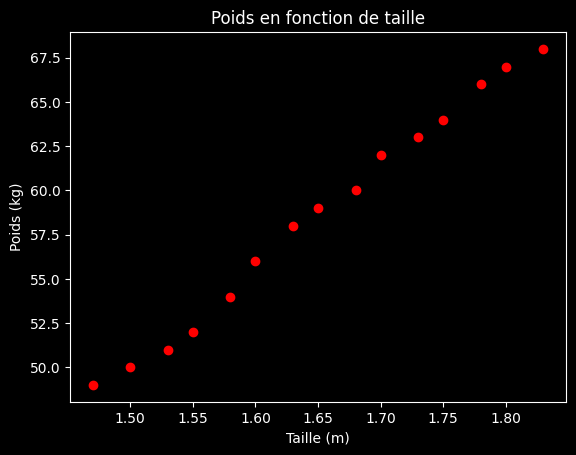

In [15]:
plt.close()

# data
# taille en mètres
x = [1.47, 1.50, 1.53, 1.55, 1.58, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83] # Taille
y = [49., 50., 51., 52., 54., 56., 58., 59.,60., 62., 63., 64., 66., 67., 68.] # Poids

# print(X.shape)
# print(y.shape)


# plot the data
plt.scatter(x, y, color='red')
plt.title('Poids en fonction de taille')
plt.xlabel('Taille (m)')
plt.ylabel('Poids (kg)')

plt.show()


On voudrait approcher les données au mieux à l'aide d'une droite $y = a . x + b$.


Ici la fonction à minimiser est la fonction $E(a,b) = \sum_i(y_ i - (aX_i + b))^2$.


La fonction `plotDroite` affiche en rouge les données de coordonnées $(dataX[i], dataY[i])$  et, en bleu, la droite  $y = ax+b$

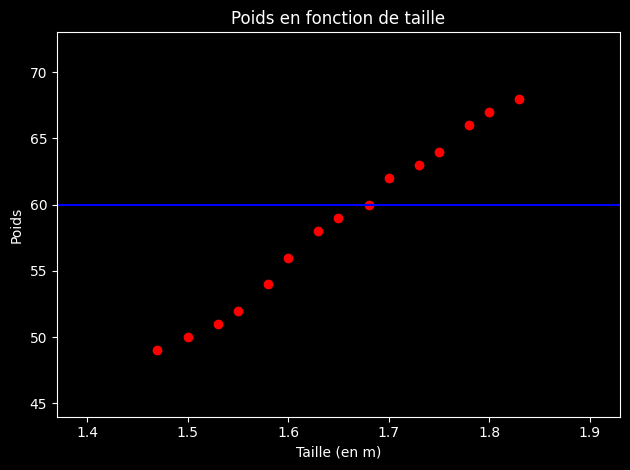

In [16]:
def plotDroite(dataX, dataY, a, b):
    
    # Representation des donnees x en fct de y
    plt.scatter(dataX, dataY, color = 'red')
    plt.title('Poids en fonction de taille')
    plt.xlabel('Taille (en m)')
    plt.ylabel('Poids')
    
    # Representation de la droite y=ax+b
    xinf = np.linspace(min(x) - 10, max(x) + 10, 500)
    yinf = [a * i + b for i in xinf]
    
    plt.plot(xinf, yinf, color = 'blue')
    plt.ylim(min(y) - 5, max(y) + 5)
    plt.xlim(min(x) - 0.1, max(x) + 0.1)
    
    plt.tight_layout()

    plt.show()

plotDroite(x, y, 0, 60)

**Question 1** 

A l'aide des widgets, visualiser l'effet d'un changement de a et b. Arrivez-vous à trouver des valeurs de a et b qui permettent d'approcher les données ?

In [34]:
interact(plotDroite, dataX = fixed(x), dataY = fixed(y), a = (-80, 80, 0.5), b = (-50, 50, .1))

interactive(children=(FloatSlider(value=0.0, description='a', max=80.0, min=-80.0, step=0.5), FloatSlider(valu…

<function __main__.plotDroite(dataX, dataY, a, b)>

**Question 2** 

Nous avons vu en cours la formule pour calculer théoriquement les paramètres $a^*$ et $b^*$ optimaux pour la regression linéaire à partir du gradient de $E$.

1. Rappelez la formule de $a^*$ et $b^*$ trouvées en cours et utiliser Python pour calculer ces paramètres optimaux.  

2. En déduire le poids théorique d'une personne de $1.77$m

3. Quelle est la valeur de l'erreur minimale $E(a^*,b^*)$ ?


Réponse 1. :  
$a^* = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$  
$b^* = \bar{y} - a^*\bar{x}$

In [18]:
# Réponse 1.
x_mean = np.mean(x)
y_mean = np.mean(y)

a_star = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b_star = y_mean - a_star * x_mean

print("a* :", a_star)
print("b* :", b_star)

# Réponse 2.
predicted_weight = a_star * 1.77 + b_star
print("Poids d'une personne de 177 cm :", predicted_weight)

# Réponse 3.
error_min = np.sum((y - (a_star * np.array(x) + b_star))**2)
print("Erreur minimale (somme des écarts au carré):", error_min)

a* : 56.38154948499776
b* : -34.54231974921631
Poids d'une personne de 177 cm : 65.25302283922974
Erreur minimale (somme des écarts au carré): 3.725033587102561


**Question 3**

1. Calculer théoriquement le gradient de la fonction de coût $E(a,b)$ (on pourra se reporter au cours)

2. Ecrire la fonction `gradReg(a,b,x,y)` qui retourne le gradient associé à la fonction de coût pour la regression linéaire.

3. Ecrire la fonction `gradDes(dataX,dataY,a0,b0,k,d)` qui fait la descente de gradient et renvoie les valeurs de a et b après k pas.

Réponse 1. :
- Le gradient de $E(a, b)$ par rapport à $a$ est $\frac{\partial E}{\partial a} = -2\sum(x_i - \bar{x})(y_i - (ax_i + b))$
- Le gradient de $E(a, b)$ par rapport à $b$ est $\frac{\partial E}{\partial b} = -2\sum(y_i - (ax_i + b))$

In [28]:
def gradReg(a, b, x, y):
    """
    Retourne le gradient associé à la fonction d'erreur pour la regression linéaire
    """
    x = np.array(x)
    y = np.array(y)
    gradient_a = -2 * np.sum((x - x_mean) * (y - (a * x + b)))
    gradient_b = -2 * np.sum(y - (a * x + b))
    
    return np.array([gradient_a, gradient_b])


def gradDes(dataX, dataY, a0, b0, k, d):
    """
    Algorithme de descente de gradient adapté au contexte de la régression linéaire
    """
    a, b = a0, b0
    for _ in range(k):
        grad = gradReg(a, b, dataX, dataY)
        a -= d * grad[0]
        b -= d * grad[1]
    return a, b

gradDes(x, y, a0 = 0, b0 = 1, k = 10000, d = 0.01)  

(56.381549484996775, -34.54231974921466)

**Question 4** 

Ecrire une fonction `plotErrEtDroite(dataX,dataY,a0,b0,k,d)` qui trace la valeur de l'erreur $E(a,b)$ en fonction du temps (nombre de pas) et qui trace les données et la droite de régression obtenue après la descente de gradient sur le même graphe (utiliser <tt>plotDroite</tt>)

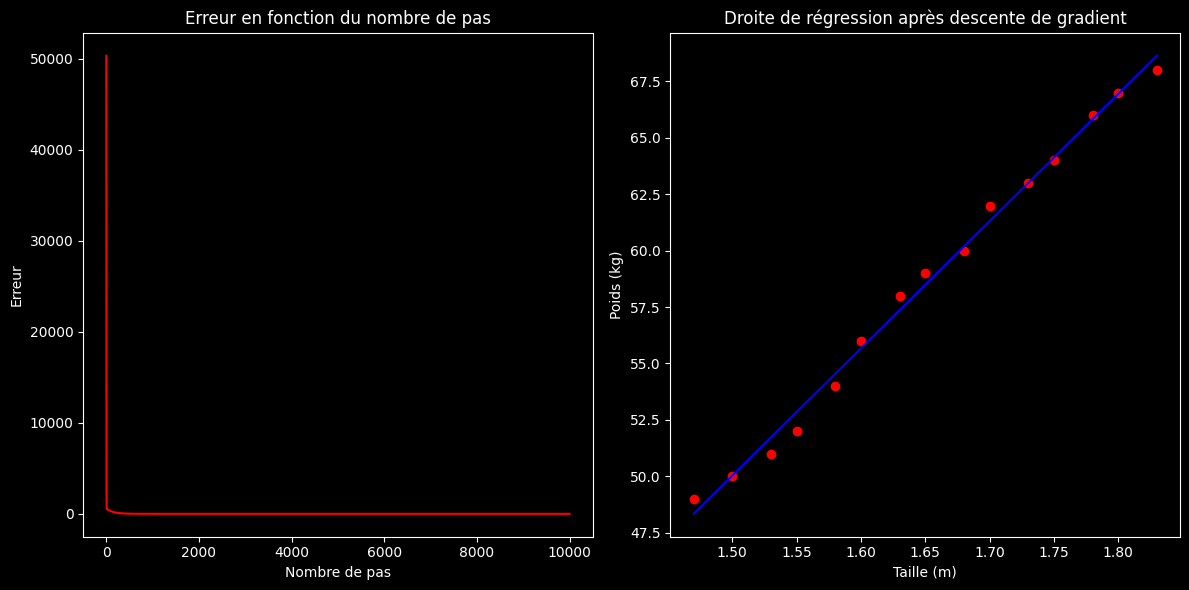

In [31]:
def plotErrEtDroite(dataX, dataY, a0 = 0, b0 = 1, k = 10, d = .01):
    a, b = a0, b0
    err = []
    for _ in range(k):
        error = np.sum((np.array(dataY) - (a * np.array(dataX) + b))**2)
        err.append(error)
        grad = gradReg(a, b, dataX, dataY)
        a -= d * grad[0]
        b -= d * grad[1]

    plt.figure(figsize = (12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(err, color = 'red')
    plt.title('Erreur en fonction du nombre de pas')
    plt.xlabel('Nombre de pas')
    plt.ylabel('Erreur')

    plt.subplot(1, 2, 2)
    plt.scatter(dataX, dataY, color = 'red')
    x_vals = np.linspace(min(dataX), max(dataX), 100)
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, color = 'blue')
    plt.title('Droite de régression après descente de gradient')
    plt.xlabel('Taille (m)')
    plt.ylabel('Poids (kg)')

    plt.tight_layout()
    plt.show()


err = plotErrEtDroite(x, y, k = 10000)

**Question 5** 

Utiliser les widgets pour visualiser l'effet d'un changement de k et d.

In [33]:
from ipywidgets import interact, fixed
interact(plotErrEtDroite, dataX = fixed(x), dataY = fixed(y), a0 = fixed(0), b0 = fixed(1), k = (0, 5000, 10), d = fixed(0.01))

interactive(children=(IntSlider(value=10, description='k', max=5000, step=10), Output()), _dom_classes=('widge…

<function __main__.plotErrEtDroite(dataX, dataY, a0=0, b0=1, k=10, d=0.01)>

**Question 6** Que ce passe-t-il si on fait la régression sur la taille en centimètres plutôt qu'en mètres. Expliquer. 

#TODO

**Question 7** Retrouver les résulats précédents à l'aide de la fonction  <tt> LinearRegression </tt> de <tt>sklearn.linear_model</tt>

In [37]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

x_cm = np.array(x) * 100

model_cm = LinearRegression()
model_cm.fit(x_cm.reshape(-1, 1), y)

a_cm = model_cm.coef_[0]
b_cm = model_cm.intercept_

model_m = LinearRegression()
model_m.fit(np.array(x).reshape(-1, 1), y)

a_m = model_m.coef_[0]
b_m = model_m.intercept_

a_cm, b_cm, a_m, b_m


(0.5638154948499775, -34.54231974921628, 56.38154948499774, -34.54231974921627)

### Bonus (pourra être utilisé pour le projet à rendre)

#### Augmentation des dimensions
Utiliser la méthode du gradient pour étudier l'influence du nombre d'heures de travail et du nombre de machine par heure sur la production d'une entreprise, à partir des données suivantes :

| Objs        | Work (hours)           | Machine/hour  |   Production ( 100 tons) |
| ------------- |:-------------:| -----:|  -----:|
| 1     | 1100 |  300 | 60  |
| 2     | 1200 |  400 | 120  |
| 3     | 1430 |  420 | 190  |
| 4     | 1500 |  400 | 250  |
| 5     | 1520 |  510 | 300  |
| 6     | 1620 |  590 | 360  |
| 7     | 1800 |  600 | 380  |
| 8     | 1820 |  630 | 430  |
| 9     | 1800 |  610 | 440  |



On cherche donc a obtenir une formule du type :

$$P= \alpha_1 W + \alpha_2 Mh + \beta $$

Dont l'erreur est donnée par 

$$E(\alpha_1,\alpha_2,\beta) =  \sum_i (P_i - (\alpha_1W_i + \alpha_2Mh_i + \beta)$$



In [39]:
W = np.array([1100, 1200, 1430, 1500, 1520, 1620, 1800, 1820, 1800])
Mh = np.array([300, 400, 420, 400, 510, 590, 600, 630, 610])
P = np.array([60, 120, 190, 250, 300, 360, 380, 430, 440])

def normalize(data):
  return (data - np.mean(data)) / np.std(data)

W_normalized = normalize(W)
Mh_normalized = normalize(Mh)

def gradient(P, W, Mh, alpha1, alpha2, beta):
  errors = P - (alpha1 * W + alpha2 * Mh + beta)
  grad_alpha1 = -2 * np.sum(errors * W)
  grad_alpha2 = -2 * np.sum(errors * Mh)
  grad_beta = -2 * np.sum(errors)
  return np.array([grad_alpha1, grad_alpha2, grad_beta])

def gradient_descent(P, W, Mh, alpha1 = 0, alpha2 = 0, beta = 0, iterations = 1000, learning_rate = 0.000001):
  for _ in range(iterations):
    grad = gradient(P, W, Mh, alpha1, alpha2, beta)
    alpha1 -= learning_rate * grad[0]
    alpha2 -= learning_rate * grad[1]
    beta -= learning_rate * grad[2]
    if np.max(np.abs(grad)) < 0.001:
      break
  return alpha1, alpha2, beta

alpha1, alpha2, beta = gradient_descent(P, W_normalized, Mh_normalized, learning_rate = 0.01)
print(f"Alpha1: {alpha1}, Alpha2: {alpha2}, Beta: {beta}")


Alpha1: 82.64193224322615, Alpha2: 46.02952859622361, Beta: 281.111111111111
